In [0]:
import math
import functools
import matplotlib.pyplot as plt
import seaborn as sns

リープフロッグ法

In [0]:
def leapflog(p_0,q_0,h_p,e):
  p_1 = p_0 - (e/2) * h_p(q_0)
  q_2 = q_0 + e * p_1
  p_2 = p_1 - (e/2) * h_p(q_2)
  
  return p_2,q_2
  

オイラー法

In [0]:
def euler(p_0,q_0,h_p,e):
  p_2 = p_0 - e * h_p(q_0)
  q_2 = q_0 + e * p_0
  
  return p_2,q_2

比較テスト

In [0]:
#set initial values
p_0 = 0
q_0 = 0.1
Lambda = 11
Alpha = 13
T = 15
epsilon = 0.01

def roller_coaster(lam,al,q):
  return lam * q - (al - 1) * math.log(q)
# text 5.51式の微分(5.52)
def roller_coaster_dif(lam,al,q):  
  return lam - (al - 1) / q
def hamiltonian(p,q,h):
  return 0.5 * p * p + h(q)

def partial_roller_coaster(Lam,Al):
  return functools.partial(roller_coaster,Lam,Al)
def partial_roller_coaster_dif(Lam,Al):
  return functools.partial(roller_coaster_dif,Lam,Al)


p_leap  = p_0
q_leap  = q_0

p_euler = p_0
q_euler = q_0

leap_list  = [[p_0,q_0,h(q_0),hamiltonian(p_0,q_0,h)]]
euler_list = [[p_0,q_0,h(q_0),hamiltonian(p_0,q_0,h)]]

h_p = partial_roller_coaster_dif(Lambda,Alpha)
h   = partial_roller_coaster(Lambda,Alpha)

for t in range(1,T):
  
  p_leap,q_leap   = leapflog(p_leap,q_leap,h_p,epsilon)
  p_euler,q_euler = euler(p_euler,q_euler,h_p,epsilon)
  
  leap_list.append([p_leap,q_leap,h(q_leap),hamiltonian(p_leap,q_leap,h)])
  euler_list.append([p_euler,q_euler,h(q_euler),hamiltonian(p_euler,q_euler,h)])

leap_hamiltonian  = [x[3] for x in leap_list]
euler_hamiltonian = [x[3] for x in euler_list]

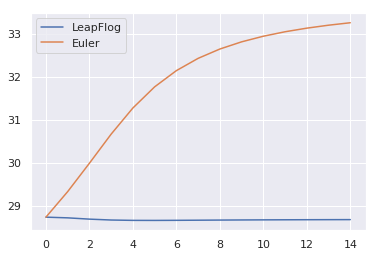

In [54]:
sns.set()
sns.lineplot(x=range(0,T),y=leap_hamiltonian, label="LeapFlog")
sns.lineplot(x=range(0,T),y=euler_hamiltonian,label="Euler")